In [5]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['figure.figsize'] = (16, 10)
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 25
matplotlib.rcParams['font.family'] = 'serif'

import GPy
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(42)

from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import accuracy_score

import config
import Data

In [84]:
info = config.ExperimentInfo(
    ndim_    = 8, 
    total_n_ = 1000, 
    start_n_ = 20, 
    end_n_   = 500, 
    test_n_  = 500, 
    name_    = "HTRU2211121323121211121",
    dataset_     = Data.HTRU_2,
    draw_data_   = False,
    draw_scores_ = False,
    update_freq_ = 10,
    comparsion_  = True)

In [85]:
var = 100
lengthscale = 1

k = GPy.kern.RBF(info.ndim, variance = var, lengthscale = lengthscale)
lik = GPy.likelihoods.Bernoulli()

In [86]:
import ScoreFunctions
import Utils

m = GPy.core.GP(
    X      = info.dataset.X_train,
    Y      = info.dataset.y_train.reshape(-1, 1), 
    kernel = k, 
    inference_method = GPy.inference.latent_function_inference.expectation_propagation.EP(),
    likelihood = lik)

m.optimize()
print(m.kern)

if (info.draw_data):
    m.plot(plot_density = True)
    
prediction = m.predict(info.dataset.X_test.reshape(-1, info.ndim))[:][0]
print(accuracy_score(info.dataset.y_test, Utils.to_labels(prediction)))

  rbf.         |  value  |  constraints  |  priors
  variance     |  100.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        
0.144


In [5]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['figure.figsize'] = (16, 10)
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 25
matplotlib.rcParams['font.family'] = 'serif'

import GPy
import numpy as np
from matplotlib import pyplot as plt

def Range(start, length, partition):
    return range(start, start + length // partition)

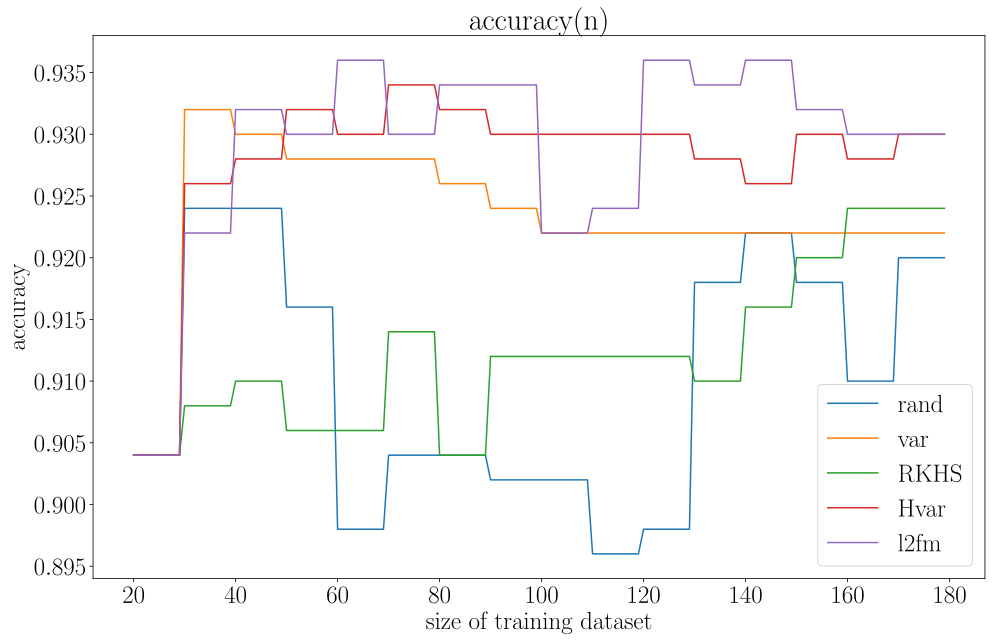

In [6]:
name = "TwoDim"
start_n = 20

acc_rand = np.loadtxt("./Results/" + name + "/accuracies/acc_rand.txt")
acc_mvar = np.loadtxt("./Results/" + name + "/accuracies/acc_mvar.txt")
acc_RKHS = np.loadtxt("./Results/" + name + "/accuracies/acc_RKHS.txt")
acc_Hvar = np.loadtxt("./Results/" + name + "/accuracies/acc_Hvar.txt")
acc_l2fm = np.loadtxt("./Results/" + name + "/accuracies/acc_l2fm.txt")

# first 1/partition of acc is shown
partition = 3

plt.plot(Range(start_n, len(acc_rand), partition), acc_rand[:len(acc_rand)//partition], label='rand')
plt.plot(Range(start_n, len(acc_mvar), partition), acc_mvar[:len(acc_mvar)//partition], label='var')
# plt.plot(Range(info.start_n, len(acc_sqsm), partition), acc_sqsm[:len(acc_sqsm)//partition], label='L2')
plt.plot(Range(start_n, len(acc_RKHS), partition), acc_RKHS[:len(acc_RKHS)//partition], label='RKHS')
plt.plot(Range(start_n, len(acc_Hvar), partition), acc_Hvar[:len(acc_Hvar)//partition], label='Hvar')
plt.plot(Range(start_n, len(acc_l2fm), partition), acc_l2fm[:len(acc_l2fm)//partition], label='l2fm')

# if info.comparsion:
#     plt.plot(Range(info.start_n, len(acc_lr), partition), acc_lr[:len(acc_lr)//partition], label='log. regression')
#     plt.plot(Range(info.start_n, len(acc_kn), partition), acc_kn[:len(acc_kn)//partition], label='k-nearest')
#     plt.plot(Range(info.start_n, len(acc_dt), partition), acc_dt[:len(acc_dt)//partition], label='decision tree')
#     plt.plot(Range(info.start_n, len(acc_rf), partition), acc_rf[:len(acc_rf)//partition], label='random forest')

plt.title("accuracy(n)")
plt.ylabel("accuracy")
plt.xlabel("size of training dataset")
plt.legend()
plt.savefig("./Results/" + name + "/Betteraccuracy" + str(partition) + ".png")